# TPOT-Clustering Starter Example (Colab)

This notebook demonstrates how to use [TPOT-Clustering](https://github.com/Mcamilo/tpot-clustering) with synthetic clustering data.

## 1. Install TPOT-Clustering

In [1]:
!pip install git+https://github.com/Mcamilo/tpot-clustering.git

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/Mcamilo/tpot-clustering.git to /tmp/pip-req-build-mql9b83x
  Running command git clone --filter=blob:none --quiet https://github.com/Mcamilo/tpot-clustering.git /tmp/pip-req-build-mql9b83x
  Resolved https://github.com/Mcamilo/tpot-clustering.git to commit 145966379355d4c2fe9ef211ff4b88ccc0c36825
  Preparing metadata (setup.py) ... done


## 2. Import Libraries

In [2]:
from tpotclustering import TPOTClustering
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

/home/barbon/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## 3. Generate Synthetic Clustering Data

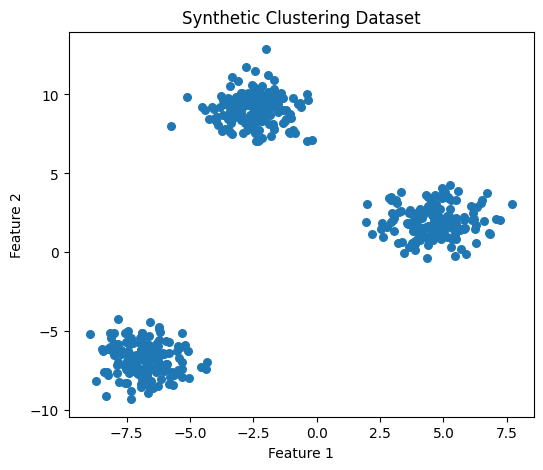

In [3]:
# Generate 500 samples, 2 features, 3 clusters
X, y = make_blobs(n_samples=500, n_features=2, centers=3, cluster_std=1.0, random_state=42)

# Visualize the data
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], s=30)
plt.title("Synthetic Clustering Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## 4. Run TPOTClustering

In [4]:
scoring = "silhouette_score"  # You can also try "davies_bouldin_score" or "calinski_harabasz_score"

tpot_clustering = TPOTClustering(
    generations=5,
    population_size=10,
    verbosity=2,
    random_state=42,
    scoring=scoring
)
tpot_clustering.fit(X)
print("Optimized clustering score:", tpot_clustering.score(X))

Version 0.1 of tpot is outdated. Version 1.0.0 was released Wednesday February 26, 2025.


                                                                            
Generation 1 - Current best internal CV score: 0.8427159447547743
                                                                            
Generation 2 - Current best internal CV score: 0.8427159447547743
                                                                            
Generation 3 - Current best internal CV score: 0.8427159447547743
                                                                            
Generation 4 - Current best internal CV score: 0.8427159447547743
                                                                            
Generation 5 - Current best internal CV score: 0.8427159447547743
                                                                            
Best pipeline: AgglomerativeClustering(input_matrix, linkage=ward, metric=euclidean, n_clusters=3)
Optimized clustering score: 0.8437565906781406


## 5. Export the Best Pipeline

In [5]:
tpot_clustering.export(f"tpot_clustering_{scoring}.py")
print(f"Best pipeline exported to tpot_clustering_{scoring}.py")

Best pipeline exported to tpot_clustering_silhouette_score.py


## 6. (Optional) Visualize Cluster Assignments from the Best Pipeline

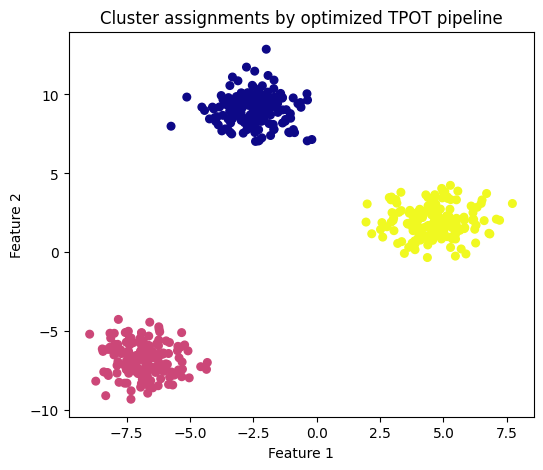

In [6]:
# Load the exported pipeline (or use the fitted pipeline directly if supported)
# Here, we'll use the fitted pipeline in the TPOTClustering object

labels = tpot_clustering.fitted_pipeline_.fit_predict(X)

plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma', s=30)
plt.title("Cluster assignments by optimized TPOT pipeline")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()